<a href="https://colab.research.google.com/github/haegomm/ai_practice/blob/master/1_3_MNIST%EC%8B%AC%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 이론과 자연어 처리 심화실습

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from torch import nn
from torch.optim import SGD, Adam

##[MY CODE] CIFAR10 Dataset 가져오기

In [3]:
#데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) #이미지 텐서 정규
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) # [MY CODE] CIFAR10 Dataset 가져오기
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True) # 학습 데이터셋 배치 단위로 나누기

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)

100%|██████████| 170M/170M [00:18<00:00, 9.15MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


50000


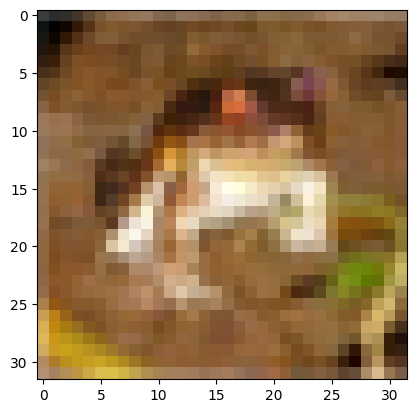

In [4]:

print(len(trainset))
image = trainset[0][0] * 0.5 + 0.5  # Normalize를 되돌려 원래 범위로 변환
image = image.permute(1, 2, 0).numpy()  # [C, H, W] -> [H, W, C]로 변경
plt.imshow(image)  # RGB 이미지 그리기
plt.show() # 출력

##[MY CODE] CIFAR10 shape 확인

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter) #데이터셋에 (이미지, labels) 튜플로 저장되어 있음
print(images.shape, labels.shape) # ##[MY CODE] CIFAR10 shape 확인

torch.Size([256, 3, 32, 32]) torch.Size([256])


##[MY CODE] LeakyReLU 사용 모델 정의

In [6]:
class ModelLeakyReLU(nn.Module):
  def __init__(self, input_dim, n_dim, num_classes, act):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, num_classes)

    self.act = act
    self.dropout = nn.Dropout(p=0.1)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.dropout(self.act(self.layer1(x)))
    x = self.dropout(self.act(self.layer2(x)))
    x = self.layer3(x)

    return x

##[MY CODE] Sigmoid 함수 사용 모델 정의

In [ ]:
class ModelSigmoid(nn.Module):
  def __init__(self, input_dim, n_dim, num_classes):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, num_classes)

    self.act = nn.Sigmoid() # [MY CODE] Sigmoid 함수 사용 모델 정의

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

##[MY CODE] 모델 평가 함수

In [13]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

##[MY CODE] plot 출력 함수

In [7]:
def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

#[MY CODE] 학습 모델

In [15]:
def train_model(model, optimizer, criterion, trainloader, testloader, n_epochs):
  train_accuracies = []
  test_accuracies = []

  for epoch in range(n_epochs):
    total_loss = 0.
    model.train() # 학습

    for data in trainloader:
      model.zero_grad()
      inputs, labels = data
      inputs, labels = inputs.to('cuda'), labels.to('cuda')

      preds = model(inputs)
      loss = criterion(preds, labels)
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

    train_accuracy = accuracy(model, trainloader)

    with torch.no_grad():
      model.eval()
      test_accuracy = accuracy(model, testloader)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | "f"Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")

  return train_accuracies, test_accuracies


##[LOG] SGD와 Adam을 학습시킨 후 각각의 epoch에 대한 train 정확도 plot

Epoch   0 | Loss: 450.6469 | Train Accuracy: 0.1567 | Test Accuracy: 0.1622
Epoch   1 | Loss: 446.9822 | Train Accuracy: 0.2126 | Test Accuracy: 0.2177
Epoch   2 | Loss: 443.4148 | Train Accuracy: 0.2375 | Test Accuracy: 0.2373
Epoch   3 | Loss: 439.8307 | Train Accuracy: 0.2497 | Test Accuracy: 0.2519
Epoch   4 | Loss: 436.1497 | Train Accuracy: 0.2588 | Test Accuracy: 0.2606
Epoch   5 | Loss: 432.3658 | Train Accuracy: 0.2641 | Test Accuracy: 0.2667
Epoch   6 | Loss: 428.5395 | Train Accuracy: 0.2681 | Test Accuracy: 0.2719
Epoch   7 | Loss: 424.7518 | Train Accuracy: 0.2705 | Test Accuracy: 0.2731
Epoch   8 | Loss: 421.0374 | Train Accuracy: 0.2733 | Test Accuracy: 0.2762
Epoch   9 | Loss: 417.4599 | Train Accuracy: 0.2759 | Test Accuracy: 0.2788
Epoch  10 | Loss: 413.9651 | Train Accuracy: 0.2788 | Test Accuracy: 0.2823
Epoch  11 | Loss: 410.6756 | Train Accuracy: 0.2822 | Test Accuracy: 0.2845
Epoch  12 | Loss: 407.5808 | Train Accuracy: 0.2861 | Test Accuracy: 0.2882
Epoch  13 | 

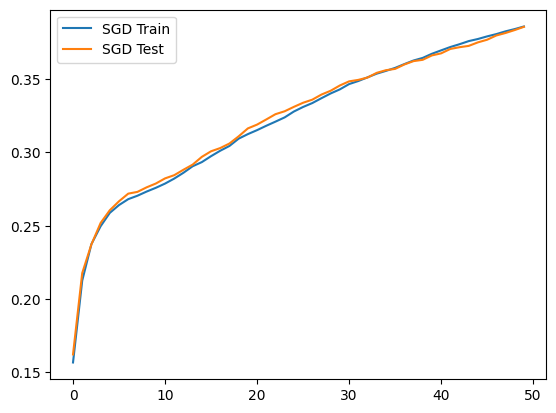

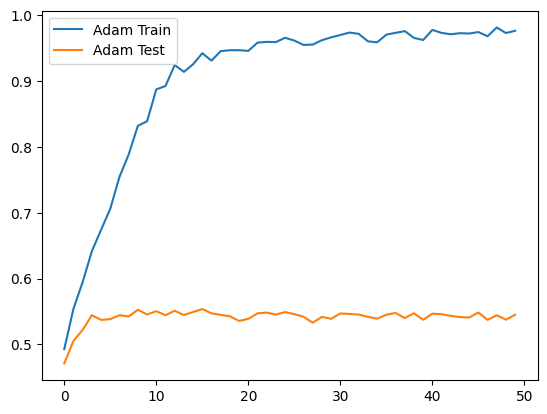

In [ ]:
lr = 0.001
n_epochs = 50
criterion = nn.CrossEntropyLoss()

# SGD 학습
model_lrelu_sgd = ModelLeakyReLU(input_dim=3 * 32 * 32, n_dim=1024, num_classes=10).to('cuda')
optimizer_lrelu_sgd = SGD(model_lrelu_sgd.parameters(), lr=lr)
lrelu_sgd_train, lrelu_sgd_test = train_model(model_lrelu_sgd, optimizer_lrelu_sgd, criterion, trainloader, testloader, n_epochs)

# Adam 학습
model_lrelu_adam = ModelLeakyReLU(input_dim=3 * 32 * 32, n_dim=1024, num_classes=10).to('cuda')
optimizer_lrelu_adam = Adam(model_lrelu_adam.parameters(), lr=lr)
lrelu_adam_train, lrelu_adam_test = train_model(model_lrelu_adam, optimizer_lrelu_adam, criterion, trainloader, testloader, n_epochs)

#[LOG] SGD와 Adam을 학습시킨 후 각각의 epoch에 대한 train 정확도 plot
plot_acc(lrelu_sgd_train, lrelu_sgd_test, label1='SGD Train', label2='SGD Test')
plot_acc(lrelu_adam_train, lrelu_adam_test, label1='Adam Train', label2='Adam Test')

##[MY CODE] Adam optimizer를 가지고 sigmoid와 leaky ReLU 모델들 학습
##[LOG] epoch에 따른 train 정확도 비교

Epoch   0 | Loss: 350.7689 | Train Accuracy: 0.4397 | Test Accuracy: 0.4290
Epoch   1 | Loss: 303.9553 | Train Accuracy: 0.4916 | Test Accuracy: 0.4682
Epoch   2 | Loss: 280.6263 | Train Accuracy: 0.5263 | Test Accuracy: 0.4885
Epoch   3 | Loss: 262.8539 | Train Accuracy: 0.5533 | Test Accuracy: 0.4925
Epoch   4 | Loss: 245.6406 | Train Accuracy: 0.5962 | Test Accuracy: 0.5104
Epoch   5 | Loss: 228.2019 | Train Accuracy: 0.6221 | Test Accuracy: 0.5142
Epoch   6 | Loss: 210.2817 | Train Accuracy: 0.6628 | Test Accuracy: 0.5165
Epoch   7 | Loss: 192.3007 | Train Accuracy: 0.6920 | Test Accuracy: 0.5087
Epoch   8 | Loss: 173.8400 | Train Accuracy: 0.7428 | Test Accuracy: 0.5087
Epoch   9 | Loss: 154.4356 | Train Accuracy: 0.7721 | Test Accuracy: 0.5113
Epoch  10 | Loss: 138.8722 | Train Accuracy: 0.7902 | Test Accuracy: 0.5143
Epoch  11 | Loss: 121.0106 | Train Accuracy: 0.8371 | Test Accuracy: 0.5149
Epoch  12 | Loss: 105.0415 | Train Accuracy: 0.8574 | Test Accuracy: 0.5051
Epoch  13 | 

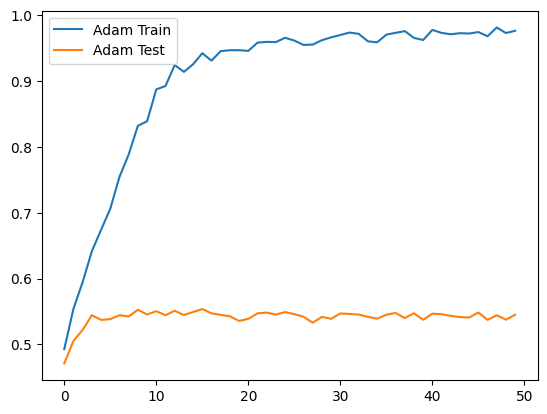

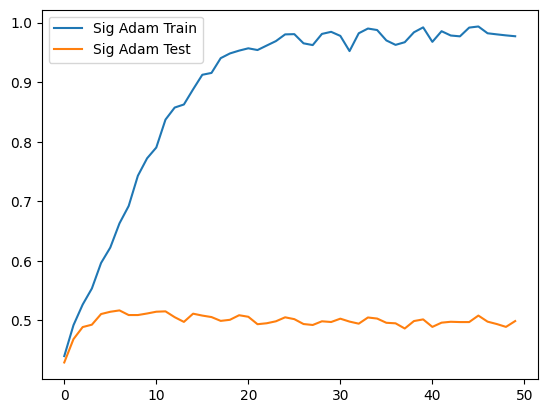

In [ ]:
#[MY CODE] Adam optimizer를 가지고 sigmoid와 leaky ReLU 모델들 학습
model_sig_adam = ModelSigmoid(input_dim=3 * 32 * 32, n_dim=1024, num_classes=10).to('cuda')
optimizer_sig_adam = Adam(model_sig_adam.parameters(), lr=lr)
sig_adam_train, sig_adam_test = train_model(model_sig_adam, optimizer_sig_adam, criterion, trainloader, testloader, n_epochs)

#[LOG] epoch에 따른 train 정확도 비교
plot_acc(lrelu_adam_train, lrelu_adam_test, label1='Adam Train', label2='Adam Test')
plot_acc(sig_adam_train, sig_adam_test, label1='Sig Adam Train', label2='Sig Adam Test')

##[MY CODE] Adam optimizer를 가지고 dropout을 적용한 모델 학습
##[LOG] epoch에 따른 train과 test 정확도 비교

Epoch   0 | Loss: 323.6545 | Train Accuracy: 0.4909 | Test Accuracy: 0.4782
Epoch   1 | Loss: 282.2621 | Train Accuracy: 0.5351 | Test Accuracy: 0.5028
Epoch   2 | Loss: 258.6513 | Train Accuracy: 0.5739 | Test Accuracy: 0.5202
Epoch   3 | Loss: 241.3162 | Train Accuracy: 0.6077 | Test Accuracy: 0.5378
Epoch   4 | Loss: 225.5633 | Train Accuracy: 0.6356 | Test Accuracy: 0.5365
Epoch   5 | Loss: 209.3388 | Train Accuracy: 0.6513 | Test Accuracy: 0.5391
Epoch   6 | Loss: 194.4465 | Train Accuracy: 0.6934 | Test Accuracy: 0.5525
Epoch   7 | Loss: 179.2634 | Train Accuracy: 0.7216 | Test Accuracy: 0.5487
Epoch   8 | Loss: 165.6460 | Train Accuracy: 0.7475 | Test Accuracy: 0.5558
Epoch   9 | Loss: 150.8418 | Train Accuracy: 0.7700 | Test Accuracy: 0.5577
Epoch  10 | Loss: 137.9958 | Train Accuracy: 0.7921 | Test Accuracy: 0.5590
Epoch  11 | Loss: 125.0121 | Train Accuracy: 0.8139 | Test Accuracy: 0.5552
Epoch  12 | Loss: 115.8394 | Train Accuracy: 0.8322 | Test Accuracy: 0.5642
Epoch  13 | 

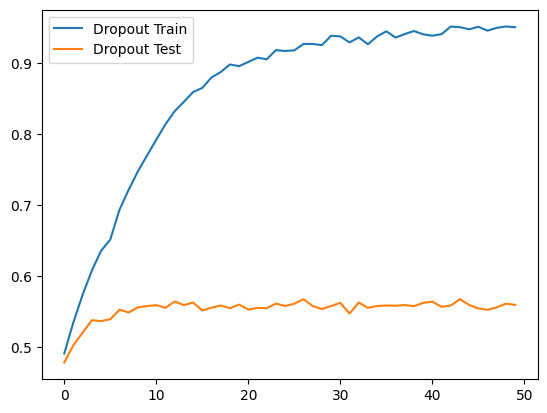

In [16]:
lr = 0.001
n_epochs = 50
criterion = nn.CrossEntropyLoss()

# Dropout 모델 정의
model_dropout = ModelLeakyReLU(input_dim=3 * 32 * 32, n_dim=1024, num_classes=10, act=nn.LeakyReLU()).to('cuda')
optimizer_dropout = torch.optim.Adam(model_dropout.parameters(), lr=lr)
dropout_train, dropout_test = train_model(model_dropout, optimizer_dropout, criterion, trainloader, testloader, n_epochs) #[MY CODE] Adam optimizer를 가지고 dropout을 적용한 모델 학습

plot_acc(dropout_train, dropout_test, label1='Dropout Train', label2='Dropout Test') #[LOG] epoch에 따른 train과 test 정확도 비교